**Created by Berkay Alan**

**Seaborn**

**17 of March, 2021**

**For more Tutorial: https://github.com/berkayalan**

## Content

**Seaborn**

 - Pyplot
 
 - Line Plot
 
 - Bar Plot
 
 - Cat Plot
 
 - Histograms
 
 - Density Plots
 
 - Pair Plot
 
 - Scatter Plot
 
 - Time Series Plotting
 
 - Box Plot
 
 - Heatmap
 
 - Multi-plot Grids

## Resources

- https://realpython.com/tutorials/data-viz/
- https://realpython.com/python-matplotlib-guide/
- https://www.kaggle.com/learn/data-visualization
- https://github.com/EnginAlpman
- https://www.w3schools.com/python/matplotlib_intro.asp
- https://www.data-to-viz.com/
- https://seaborn.pydata.org/

## Importing Library

In [ ]:
import seaborn as sns

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
from datetime import datetime, timedelta #It's for time series

## Seaborn

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

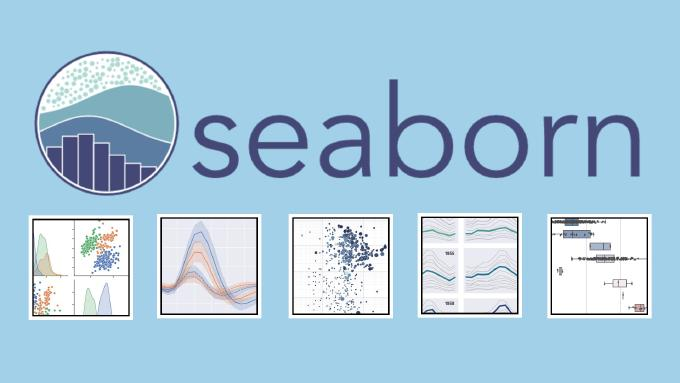

## Line Plots

We will plot data scientist's salaries with respect to their experiences. In order to do it, we can use **sns.lineplot()** function.

In [ ]:
experience = [1,3,4,5,7,8,10,12]

salary = [6500, 9280, 12050, 13200, 16672, 21000, 23965, 29793]

In [ ]:
sns.lineplot(x=experience,y=salary)

plt.title("Salaries of Data Scientists by their Experience")
plt.xlabel("Experience")
plt.ylabel("Salary")

plt.show()

**Plotting Multiple Graphs in One Graph**

We will also add software engineer's salary to our graph.

In [ ]:
experience = [1,3,4,5,7,8,10,12]

data_scientists_salary = [6500, 9280, 12050, 13200, 16672, 21000, 23965, 29793]

software_engineers_salary = [9020, 12873, 15725, 18000, 19790, 20196, 25769,32000 ]

In [ ]:
sns.lineplot(experience,data_scientists_salary)
sns.lineplot(experience,software_engineers_salary)

plt.title("Salary of Data Scientists and Software Engineers by their experiences")
plt.xlabel("Experience")
plt.ylabel("Salary")

plt.legend(["Data Scientists","Software Engineers"])

plt.show()

Seaborn has several datasets inside of it. We will use flights dataset for a real world example. First we will load the data.

In [ ]:
flights = sns.load_dataset("flights")
flights.head()

In order to see the dataframe on monthly basis, we will do a pivot table by using **pivot()** function.

In [ ]:
flights_wide = flights.pivot("year", "month", "passengers")
flights_wide.head()

As an example, let's see flights in June months.

In [ ]:
sns.lineplot(data=flights_wide["Jun"])

plt.title("Flights in June")
plt.xlabel("Years")
plt.ylabel("Passengers")
plt.show()

If we pass the entire dataset in long-form mode will aggregate over repeated values (each year) to show the mean and 95% confidence interval.

In [ ]:
sns.lineplot(data=flights, x="year", y="passengers",color="r")

plt.title("Number of Passengers by year")
plt.xlabel("Years")
plt.ylabel("Passengers")
plt.show()

We can also see each month by one by.

In [ ]:
plt.figure(figsize=(20,7))

sns.lineplot(data=flights, x="year", y="passengers", hue="month")

plt.title("Number of Passengers by year on monthly basis")
plt.xlabel("Years")
plt.ylabel("Passengers")
plt.show()

## Bar Plots

We will use **barplot()** function.

In [ ]:
x = ["A", "B", "C", "D"]
y = [3, 8, 1, 10]

In [ ]:
sns.barplot(x=x,y=y)

plt.show()

Let's plots salaries of data scientists by their gender. We will use *hue* argument for that.

In [ ]:
experience = [1,2,3,4,5,6,7,8]

data_scientists_salary = [6500, 9280, 12050, 13200, 16672, 21000, 23965, 29793]

genders = ["Men","Men","Women","Men","Women","Women","Women","Men"]

In [ ]:
sns.barplot(x=experience,y=data_scientists_salary,hue=genders)

plt.title("Salaries of data scientists by their gender")
plt.show()

We can make it horizontal. We will use *orient* argument for that.

In [ ]:
sns.barplot(y=experience,x=data_scientists_salary,orient = 'h')

plt.title("Salaries of data scientists")
plt.show()

We can combine bar and line plot.

In [ ]:
sns.barplot(x=experience,y=data_scientists_salary)
sns.lineplot(x=experience,y=data_scientists_salary)

plt.title("Salaries of data scientists")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

## Cat Plot

 Figure-level interface for drawing categorical plots onto a FacetGrid. This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations.

For a real world example, we will use *tips* dataset of seaborn. First we will load it.

In [ ]:
tips = sns.load_dataset("tips")

In [ ]:
sns.catplot(x="day", y="total_bill", data=tips)

plt.show()

The *jitter* parameter controls the magnitude of jitter or disables it altogether.

In [ ]:
sns.catplot(x="day", y="total_bill", data=tips,jitter=False)

plt.title("Total Bills by Day")

plt.show()

## Histograms

In [ ]:
notes = [30,74,94,14,55,47,63,28,88,44,53,18,66,74,81]

In [ ]:
sns.distplot(a=notes,kde=False,color="r")

plt.title("Histogram of Notes")
plt.show()

**kde** is something we'll always provide when creating a histogram, as leaving it out will create a slightly different plot.

In [ ]:
sns.distplot(a=notes,color="r")

plt.title("Histogram of Notes")
plt.show()

For a real world example, we will work with Human Resources Data Set.

Dataset can be downloaded from here : https://www.kaggle.com/rhuebner/human-resources-data-set

We will read it with pandas.

In [ ]:
df = pd.read_csv("../input/human-resources-data-set/HRDataset_v14.csv")

In [ ]:
df.head()

We will work with *Salary* column.

In [ ]:
plt.style.use("fivethirtyeight")

bins = [40000,55000,70000,85000,100000,120000]

sns.distplot(df.Salary,bins=bins,color="blue",kde=False)

plt.title("Salaries of Workers")
plt.xlabel("Salary")
plt.ylabel("Count")

plt.tight_layout()
plt.grid(False)
plt.show()

Now we'll create plots to understand differences between Performance Scores of Employees. In order to do that, first we will divide dataset into 4 datasets by performance score.

In [ ]:
fully_meets = df[df["PerformanceScore"]=="Fully Meets"]
exceeds = df[df["PerformanceScore"]=="Exceeds"]
needs_improvement = df[df["PerformanceScore"]=="Needs Improvement"]
pip = df[df["PerformanceScore"]=="PIP"]

In [ ]:
sns.distplot(a= fully_meets["Salary"], label="Fully Meets", kde=False)
sns.distplot(a=exceeds["Salary"] , label="Exceeds", kde=False)
sns.distplot(a= needs_improvement["Salary"], label="Needs Improvement", kde=False)
sns.distplot(a=pip["Salary"], label="Pip", kde=False)

plt.title("Histogram of Performance Scores of Employees by their Performance Score")

plt.legend()

plt.show()

## Density Plots

A density plot is a representation of the distribution of a numeric variable. It uses a kernel density estimate to show the probability density function of the variable. It is a smoothed version of the histogram and is used in the same concept.

It is said "Kernel Density Plot" in general. We will use **sns.kdeplot** command for that.

In [ ]:
notes = [30,74,94,14,55,47,63,28,88,44,53,18,66,74,81]

In [ ]:
sns.kdeplot(data=notes, shade=True) # Setting shade=True colors the area below the curve

plt.title("Density Plot of Notes")

plt.show()

We're not restricted to a single column when creating a KDE plot. We can create a two-dimensional (2D) KDE plot with the **sns.jointplot** command.

In [ ]:
first_exam_notes = [30,74,94,14,55,47,63,28,88,44,53,18,66,74,81]
final_exam_notes = [96,77,19,29,56,29,33,49,83,37,84,73,16,48,79]

In [ ]:
sns.jointplot(x=first_exam_notes,y=final_exam_notes,kind="kde") # Setting shade=True colors the area below the curve

plt.show()

In [ ]:
sns.kdeplot(data=first_exam_notes,label="First Exam Notes", shade=True)
sns.kdeplot(data=final_exam_notes,label="Final Exam Notes", shade=True)

plt.title("Kernel Density Plot of Notes")

plt.show()

## Pair Plot

It lets you visualize plots of every combination of various attributes together, so you can look for interesting patterns between features. We will use **sns.pairplot()** function in order to plot.

For a real world example, we will use iris dataset of Seaborn.

In [ ]:
iris = sns.load_dataset("iris")

In [ ]:
iris.head()

In [ ]:
sns.pairplot(iris)

plt.show()

If we want a smaller plot, we should use less variables. For example, if we only want sepal_width and sepal_length, than would create a 2x2 plot.

We can use *vars* or *x_vars* and *y_vars* to select the variables to plot.

In [ ]:
sns.pairplot(data=iris, vars=["sepal_width", "sepal_length"])

plt.show()

In [ ]:
sns.pairplot(data=iris, x_vars=["sepal_width", "sepal_length","petal_width"],
                        y_vars=["sepal_width", "sepal_length"])

plt.show()

Assigning a hue variable adds a semantic mapping and changes the default marginal plot to a layered kernel density estimate (KDE).

In [ ]:
sns.pairplot(iris,hue="species")

plt.show()

The *markers* parameter applies a style mapping on the off-diagonal axes. Currently, it will be redundant with the hue variable.

In [ ]:
sns.pairplot(iris,hue="species",markers=["o", "s", "D"])

plt.show()

It’s possible to force marginal histograms by using *diag_kind* argument.

In [ ]:
sns.pairplot(iris,hue="species",diag_kind="hist")

plt.show()

As with other figure-level functions, the size of the figure is controlled by setting the *height* of each individual subplot:

In [ ]:
sns.pairplot(iris,height=2)

plt.show()

If we set *corner=True* to plot only the lower triangle.

In [ ]:
sns.pairplot(iris,corner=True)

plt.show()

The *plot_kws* and *diag_kws* parameters accept dicts of keyword arguments to customize the off-diagonal and diagonal plots, respectively.

In [ ]:
sns.pairplot(data=iris,
            plot_kws={"marker":"+","linewidth":1},
            diag_kws={"fill":False})

plt.show()

The return object is the underlying *PairGrid*, which can be used to further customize the plot.

In [ ]:
ax=sns.pairplot(iris, diag_kind="kde")

ax.map_lower(sns.kdeplot, levels=4, color = "darkred")

## Scatter Plots

To create a simple scatter plot, we use the **sns.scatterplot()** command.

In [ ]:
experience = [1,2,3,4,5,6,7,8]

data_scientists_salary = [6500, 9280, 12050, 13200, 16672, 21000, 23965, 29793]

In [ ]:
sns.scatterplot(x=experience,y=data_scientists_salary)

plt.title("Data Scientist's Salaries by their experience")
plt.show()

For a real world example, we will work with Human Resources Data Set.

Dataset can be downloaded from here : https://www.kaggle.com/rhuebner/human-resources-data-set

We will read it with pandas.

In [ ]:
df = pd.read_csv("../input/human-resources-data-set/HRDataset_v14.csv")

In [ ]:
df.head()

We will check if there is a relationship between salaries and Engagement Survey Scores of employees.

In [ ]:
plt.figure(figsize=(15,5))

sns.scatterplot(x=df.Salary,y=df.EngagementSurvey,color="r")

plt.title("Salaries of Employees by their Engagement Survey Score")
plt.show()

To double-check the strength of this relationship, we might like to add a regression line, or the line that best fits the data. We do this by changing the command to **sns.regplot**.

In [ ]:
plt.figure(figsize=(15,5))

sns.regplot(x=df.Salary,y=df.EngagementSurvey,color="b")

plt.title("Salaries of Employees by their Engagement Survey Score")
plt.show()

We can use scatter plots to display the relationships between three variables! One way of doing this is by *color-coding* the points.

For instance, to understand how gender affects the relationship between salaries and Engagement Survey Scores of employees, we can color-code the points by 'Sex', and plot the other two columns on the axes. We will use **hue** argument for that.

In [ ]:
plt.figure(figsize=(15,5))

sns.scatterplot(x=df.Salary,y=df.EngagementSurvey,hue=df.Sex)

plt.xlabel("Salary")
plt.ylabel("Engagement Survey Score")

plt.title("Salaries of Employees by their Engagement Survey Score based on Gender")
plt.show()

We can use the **sns.lmplot()** command to add two regression lines, corresponding to males and females.

In [ ]:
plt.figure(figsize=(10,10))

sns.lmplot(x="Salary",y="EngagementSurvey",hue="Sex",data=df)

plt.xlabel("Salary")
plt.ylabel("Engagement Survey Score")

plt.title("Salaries of Employees by their Engagement Survey Score based on Gender")
plt.show()

Usually, we use scatter plots to highlight the relationship between two continuous variables (like "salary" and "engagement survey score"). However, we can adapt the design of the scatter plot to feature a categorical variable (like "sex") on one of the main axes. We'll refer to this plot type as a *categorical scatter plot*, and we build it with the **sns.swarmplot()** command.

In [ ]:
plt.figure(figsize=(5,5))

sns.swarmplot(x="Sex",y="Salary",data=df)

plt.xlabel("Gender")
plt.ylabel("Salary")

plt.title("Salaries of Employees by their Gender")
plt.show()

## Plotting Time Series

We can use **sns.lineplot()** function in order to plot time series in seaborn.

In [ ]:
df = pd.DataFrame({"Date": ['1/2/2021',
                             '1/3/2021',
                             '1/4/2021',
                             '1/5/2021',
                             '1/6/2021',
                             '1/7/2021',
                             '1/7/2021',
                             '1/8/2021'],
                   "Piece": [19.5, 19.,19.5,19.5,21,19.5,20,23]})

In [ ]:
sns.lineplot(x="Date",y="Piece",data = df)

plt.xticks(rotation=30)

plt.title("Time Series in Seaborn")

plt.show()

## Boxplot

In descriptive statistics, a box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending from the boxes (whiskers) indicating variability outside the upper and lower quartiles. We will use **sns.boxplot()** function for that.

In [ ]:
notes = [44,55,15,95,82,51,37,76,7,84,29,48]

In [ ]:
sns.boxplot(notes)

plt.title("Boxplot of Notes")

plt.show()

Seaborn gets data automatically as x stick. But if we specify it as y, it will be horizontal.

In [ ]:
sns.boxplot(y=notes,color="r")

plt.title("Boxplot of Notes")
plt.ylabel("Notes")

plt.show()

We can also visualize multiple data as boxplot.

For a real world example, we will work with Human Resources Data Set.

Dataset can be downloaded from here : https://www.kaggle.com/rhuebner/human-resources-data-set

We will read it with pandas.

In [ ]:
df = pd.read_csv("../input/human-resources-data-set/HRDataset_v14.csv")

In [ ]:
df.head()

In [ ]:
plt.figure(figsize=(15,5))

sns.boxplot( x=df["PerformanceScore"], y=df["Salary"] )

plt.title("Boxplot of Salaries")
plt.ylabel("Salary")
plt.xlabel("Persormance Score")

plt.show()

The size of the individual boxplots can be altered with the *width* parameter. The default width is 1, so anything less of that creates a smaller width for the boxes.

In [ ]:
sns.boxplot( x=df["PerformanceScore"], y=df["Salary"],width=0.5)

plt.title("Boxplot of Salaries")
plt.ylabel("Salary")
plt.xlabel("Persormance Score")

plt.show()

We can draw a boxplot with nested grouping by two categorical variables.

In [ ]:
plt.figure(figsize=(13,5))

sns.boxplot(x="PerformanceScore", y="Salary",hue="Sex",data=df, palette="Set3")

plt.title("Boxplot of Salaries")
plt.ylabel("Salary")
plt.xlabel("Persormance Score")

plt.show()

We can draw a boxplot for each numeric variable in a DataFrame.

In [ ]:
plt.figure(figsize=(13,5))

sns.boxplot(x="DaysLateLast30",y="PerformanceScore",data=df, palette="Set2",orient="h")

plt.title("Boxplot of Late days and Performance Score")
plt.ylabel("Performance Score")
plt.xlabel("Late Days")

plt.show()

We can use **swarmplot()** to show the datapoints on top of the boxes.

In [ ]:
plt.figure(figsize=(13,5))

sns.boxplot(x="PerformanceScore", y="Salary",data=df, palette="Set3")
sns.swarmplot(x="PerformanceScore", y="Salary",data=df,color="r")

plt.title("Boxplot of Salaries")
plt.ylabel("Salary")
plt.xlabel("Persormance Score")

plt.show()

## Heatmap

We will use **sns.heatmap()** function in order to create heatmaps.

For a real world example, we will use **flights** dataset of Seaborn.

In [ ]:
flights = sns.load_dataset("flights")

In [ ]:
flights.head()

Let's make a pivot table in order to make this dataset ready to plot heatmap. Otherwise heatmap will not work.

In [ ]:
flights = flights.pivot("month","year","passengers")

In [ ]:
flights

In [ ]:
sns.heatmap(flights)

plt.title("Heatmap of Flights")

plt.show()

We can change the limits of colormap by using *vmin* and *vmax* arguments.

In [ ]:
sns.heatmap(flights, vmin=100,vmax=700)

plt.title("Heatmap of Flights")

plt.show()

We can plot a heatmap for data centered on 500 with a diverging colormap.

In [ ]:
sns.heatmap(flights, center=500)

plt.title("Heatmap of Flights")

plt.show()

We can annotate each cell with the numeric value using integer formatting. We can use *annot* argument for that.

In [ ]:
plt.figure(figsize=(10,7))

sns.heatmap(flights, annot=True,fmt="d")

plt.title("Heatmap of Flights")

plt.show()

We can add lines between each cell by using *linewidths* argument.

In [ ]:
sns.heatmap(flights, linewidths=0.5,linecolor="blue")

plt.title("Heatmap of Flights")

plt.show()

We can change the colormap by using *cmap* argument.

In [ ]:
sns.heatmap(flights, cmap="YlGnBu")

plt.title("Heatmap of Flights")

plt.show()

If we don't want a colorbar, we need to make *cbar* argument false.

In [ ]:
sns.heatmap(flights, cbar=False)

plt.title("Heatmap of Flights")

plt.show()

## Multi-plot Grids

When exploring multi-dimensional data, a useful approach is to draw multiple instances of the same plot on different subsets of our dataset. This technique is sometimes called either *lattice* or *trellis* plotting, and it is related to the idea of “small multiples”.

The **FacetGrid** class is useful when we want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of our dataset. 

Each of *relplot(), displot(), catplot()*, and *lmplot()* use this object internally, and they return the object when they are finished so that it can be used for further tweaking.

For a real world example, we will use **tips** dataset of Seaborn.

In [ ]:
tips = sns.load_dataset("tips")

In [ ]:
tips.head()

In [ ]:
ax= sns.FacetGrid(tips,col="time") #col argument takes the column we want.

ax.map(sns.distplot, "tip")

plt.show()

In order to make a relational plot, we need to pass multiple variable names. We can also provide *keyword* arguments, which will be passed to the plotting function.

In [ ]:
g = sns.FacetGrid(tips, col="smoker", hue="sex")

g.map(sns.scatterplot, "total_bill", "tip", alpha=.4)

g.add_legend()

plt.show()